# Identify customer segments from given data and categorize customer into one of the segments.(Clustering)

# Read Dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/I A T Laptop L.L.C/Desktop/Project-II/training_set (1).csv")

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.shape

(614, 13)

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
#A.isna().sum()

In [7]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Missing Data treatment

In [8]:
cat =[]
con =[]

for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
        x = A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        con.append(i)
        x = A[i].mean()
        A[i]=A[i].fillna(x)

In [9]:
#A.isna().sum()

In [10]:
B = A.drop(labels=["Loan_ID"],axis=1)

# Imp columns used to create clusters

In [11]:
B = B[["ApplicantIncome","LoanAmount"]]

In [12]:
B.head(2)

,ApplicantIncome,LoanAmount
0,5849.00000,146.412162
1,5405.54085,128.000000


# Data Preprocessing-Standardisation,Outlier removal

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(B),columns=B.columns)

from PM8wd import outliers
ol = outliers(Xnew)

Xnew = Xnew.drop(index=ol,axis=0)
Xnew.index = range(0,Xnew.shape[0])

B = B.drop(index=ol,axis=0)
B.index = range(0,B.shape[0])

In [14]:
Xnew.shape

(594, 2)

In [15]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=3)
model = agc.fit(Xnew)
Xnew['Cluster']=model.labels_

In [24]:
Xnew.head(2)

,ApplicantIncome,LoanAmount,Cluster
0,0.072651,0.000000,0
1,0.000000,-0.219273,0


# Plotting

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Income')

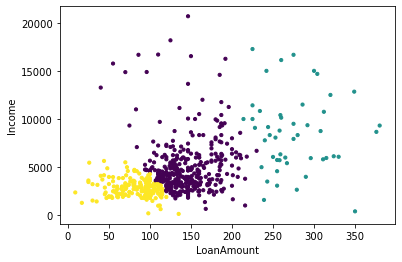

In [18]:
plt.scatter(B.LoanAmount,B.ApplicantIncome,s=10,c=model.labels_)
plt.xlabel("LoanAmount")
plt.ylabel("Income")